In [7]:
#Instalação de bibliotecas
!pip install graphviz

In [81]:
#Bibliotecas em uso
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import graphviz
from datetime import datetime

## Importação dos dados
Foram utilizadas 3 bases de dados:
1. Base com os dados de acidentes nos EUA nos anos de 2016 a 2021
2. Base com o número de veículos nos EUA nos anos de 2016 a 2021 por estado
3. Base com a relação das siglas e o nomes do estados nos EUA.

In [3]:
#Dados base dos acidentes
df = pd.read_csv('I:/OneDrive - det.ufc.br/Cursos Extras/Pos Ciencia de Dados e Big Data/TCC-PucMinas/Database/US_Accidents_Dec21_updated.csv')

In [4]:
#Nomes dos estados
df_state = pd.read_csv('I:/OneDrive - det.ufc.br/Cursos Extras/Pos Ciencia de Dados e Big Data/TCC-PucMinas/Database/state_name.csv',sep=';')

In [7]:
#Arquivos com os volumes de veículos por estados
xls = pd.ExcelFile('I:/OneDrive - det.ufc.br/Cursos Extras/Pos Ciencia de Dados e Big Data/TCC-PucMinas/Database/Vehicle Registration US.xlsx')
df_veh2016 = pd.read_excel(xls, sheet_name='2016')
df_veh2017 = pd.read_excel(xls, sheet_name='2017')
df_veh2018 = pd.read_excel(xls, sheet_name='2018')
df_veh2019 = pd.read_excel(xls, sheet_name='2019')
df_veh2020 = pd.read_excel(xls, sheet_name='2020')
df_veh2021 = pd.read_excel(xls, sheet_name='2021')

## Tratamento dos dados
Tratamento dos dados para que estejam prontos para a análise

In [10]:
#Tratanto para o nome dos estados com nome composto estarem sem espaço
df_veh2016['State'] = df_veh2016['State'].str.replace(' ', '')
df_veh2017['State'] = df_veh2017['State'].str.replace(' ', '')
df_veh2018['State'] = df_veh2018['State'].str.replace(' ', '')
df_veh2019['State'] = df_veh2019['State'].str.replace(' ', '')
df_veh2020['State'] = df_veh2020['State'].str.replace(' ', '')
df_veh2021['State'] = df_veh2021['State'].str.replace(' ', '')
#Colocando o ano como uma coluna em cada uma das tabelas
df_veh2016['Ano'] = 2016
df_veh2017['Ano'] = 2017
df_veh2018['Ano'] = 2018
df_veh2019['Ano'] = 2019
df_veh2020['Ano'] = 2020
df_veh2021['Ano'] = 2021
#Modificando o tipo dessa coluna
df_veh2016['Ano'] = pd.to_datetime(df_veh2016['Ano'], format='%Y')
df_veh2017['Ano'] = pd.to_datetime(df_veh2017['Ano'], format='%Y')
df_veh2018['Ano'] = pd.to_datetime(df_veh2018['Ano'], format='%Y')
df_veh2019['Ano'] = pd.to_datetime(df_veh2019['Ano'], format='%Y')
df_veh2020['Ano'] = pd.to_datetime(df_veh2020['Ano'], format='%Y')
df_veh2021['Ano'] = pd.to_datetime(df_veh2021['Ano'], format='%Y')
#Colocando a sigla do estado em todos
df_veh2016 = pd.merge(df_veh2016, df_state, left_on='State', right_on='Nome', how='left')
df_veh2017 = pd.merge(df_veh2017, df_state, left_on='State', right_on='Nome', how='left')
df_veh2018 = pd.merge(df_veh2018, df_state, left_on='State', right_on='Nome', how='left')
df_veh2019 = pd.merge(df_veh2019, df_state, left_on='State', right_on='Nome', how='left')
df_veh2020 = pd.merge(df_veh2020, df_state, left_on='State', right_on='Nome', how='left')
df_veh2021 = pd.merge(df_veh2021, df_state, left_on='State', right_on='Nome', how='left')
#Renomeando o nome da coluna Total
df_veh2016 = df_veh2016.rename(columns={'Total 2016': 'Total_veh'})
df_veh2017 = df_veh2017.rename(columns={'Total 2017': 'Total_veh'})
df_veh2018 = df_veh2018.rename(columns={'Total 2018': 'Total_veh'})
df_veh2019 = df_veh2019.rename(columns={'Total 2019': 'Total_veh'})
df_veh2020 = df_veh2020.rename(columns={'Total 2020': 'Total_veh'})
df_veh2021 = df_veh2021.rename(columns={'Total 2021': 'Total_veh'})
#Criando um dataframe único para ser usado no merge com a tabela principal
df_veh = pd.concat([df_veh2016,df_veh2017,df_veh2018,df_veh2019,df_veh2020,df_veh2021], axis=0)

In [11]:
# Selecionando somente as colunas necessárias
df_veh_total = df_veh[['Estado','Ano','Total_veh']]

In [12]:
# Transformando as datas para o tipo correto
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [18]:
#Criando o dataframe principal com os dados de acidentes
dados_acidentes = df[['Severity', 'Start_Time', 'End_Time', 'Side', 'City', 'County', 'State', 'Temperature(F)', 'Humidity(%)', 
                      'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Traffic_Signal', 'Sunrise_Sunset']]
#Coluna com os o ano de refência do acidente
dados_acidentes['Ano'] = dados_acidentes['Start_Time'].dt.to_period('Y').dt.to_timestamp()
dados_acidentes['Mes_ano'] = dados_acidentes['Start_Time'].dt.to_period('M').dt.to_timestamp()
#Coluna com a duracão do acidente
dados_acidentes['Duracao(min)'] = ((dados_acidentes['End_Time'] - dados_acidentes['Start_Time']).dt.total_seconds() / 60).astype(int)

C:\Users\William\AppData\Local\Temp\ipykernel_8360\3242424519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_acidentes['Ano'] = dados_acidentes['Start_Time'].dt.to_period('Y').dt.to_timestamp()
C:\Users\William\AppData\Local\Temp\ipykernel_8360\3242424519.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_acidentes['Mes_ano'] = dados_acidentes['Start_Time'].dt.to_period('M').dt.to_timestamp()
C:\Users\William\AppData\Local\Temp\ipykernel_8360\3242424519.py:8: SettingWithCopyWarning: 
A val

In [19]:
#Fazendo merge com a tabela com os dados da quantidade de veículos por estado
dados_acidentes_total = pd.merge(dados_acidentes, df_veh_total, left_on=['State', 'Ano'], right_on=['Estado','Ano'], how='left')
dados_acidentes_total.drop('Estado', axis=1, inplace=True)

In [20]:
#Mudando as colunas necessárias para o tipo categórico ordenado
# 1 representa o menos severo
dados_acidentes_total['Severity'] = dados_acidentes_total['Severity'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))
# Categorizando o lado da pista onde ocorreu o acidente
dados_acidentes_total['Side'] = dados_acidentes_total['Side'].astype(pd.CategoricalDtype(categories=['R', 'L', 'N']))

In [21]:
dados_acidentes_total.isnull().sum()

Severity                0
Start_Time              0
End_Time                0
Side                    0
City                  137
County                  0
State                   0
Temperature(F)      69274
Humidity(%)         73092
Pressure(in)        59200
Visibility(mi)      70546
Wind_Direction      73775
Wind_Speed(mph)    157944
Traffic_Signal          0
Sunrise_Sunset       2867
Ano                     0
Mes_ano                 0
Duracao(min)            0
Total_veh               0
dtype: int64

In [22]:
#Formato do dataframe
print('A fonte de dados contem linhas: {:,d} e colunas: {}'.format(dados_acidentes_total.shape[0], dados_acidentes_total.shape[1]))

A fonte de dados contem linhas: 2,845,342 e colunas: 19


In [23]:
#Tratando os valores nulos
# Retirando as linhas com valores nulos de temperatura
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Temperature(F)'])
# Retirando as linhas com valores nulos de Sunrise_Sunset
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Sunrise_Sunset'])
# Retirando as linhas com valores nulos de Wind_Speed(mph)
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Wind_Speed(mph)'])
# Retirando as linhas com valores nulos de Wind_Direction
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Wind_Direction'])
# Retirando as linhas com valores nulos de Visibility(mi) 
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Visibility(mi)'])
# Retirando as linhas com valores nulos de Pressure(in)
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Pressure(in)'])
# Retirando as linhas com valores nulos de Humidity(%)
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Humidity(%)'])

In [24]:
#Formato do dataframe
print('A fonte de dados contem linhas: {:,d} e colunas: {}'.format(dados_acidentes_total.shape[0], dados_acidentes_total.shape[1]))

A fonte de dados contem linhas: 2,662,384 e colunas: 19


In [25]:
dados_acidentes_total.isnull().sum()

Severity           0
Start_Time         0
End_Time           0
Side               0
City               0
County             0
State              0
Temperature(F)     0
Humidity(%)        0
Pressure(in)       0
Visibility(mi)     0
Wind_Direction     0
Wind_Speed(mph)    0
Traffic_Signal     0
Sunrise_Sunset     0
Ano                0
Mes_ano            0
Duracao(min)       0
Total_veh          0
dtype: int64

In [26]:
#Resetando o index do dataframe
dados_acidentes_total = dados_acidentes_total.reset_index(drop=True)
dados_acidentes_total.head(5)

,Severity,Start_Time,End_Time,Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Traffic_Signal,Sunrise_Sunset,Ano,Mes_ano,Duracao(min),Total_veh
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,R,Dublin,Franklin,OH,42.1,58.0,29.76,10.0,SW,10.4,False,Night,2016-01-01,2016-02-01,360,9979600
1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,R,Cincinnati,Hamilton,OH,37.0,93.0,29.69,10.0,WSW,10.4,False,Day,2016-01-01,2016-02-01,360,9979600
2,2,2016-02-08 08:16:57,2016-02-08 14:16:57,R,Williamsburg,Clermont,OH,35.6,100.0,29.66,10.0,WSW,8.1,True,Day,2016-01-01,2016-02-01,360,9979600
3,2,2016-02-08 08:15:41,2016-02-08 14:15:41,R,Dayton,Montgomery,OH,33.8,100.0,29.63,3.0,SW,2.3,False,Day,2016-01-01,2016-02-01,360,9979600
4,2,2016-02-08 11:51:46,2016-02-08 17:51:46,R,Cleveland,Cuyahoga,OH,33.1,92.0,29.63,0.5,SW,3.5,False,Day,2016-01-01,2016-02-01,360,9979600


In [27]:
dados_acidentes_total

,Severity,Start_Time,End_Time,Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Traffic_Signal,Sunrise_Sunset,Ano,Mes_ano,Duracao(min),Total_veh
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,R,Dublin,Franklin,OH,42.1,58.0,29.76,10.0,SW,10.4,False,Night,2016-01-01,2016-02-01,360,9979600
1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,R,Cincinnati,Hamilton,OH,37.0,93.0,29.69,10.0,WSW,10.4,False,Day,2016-01-01,2016-02-01,360,9979600
2,2,2016-02-08 08:16:57,2016-02-08 14:16:57,R,Williamsburg,Clermont,OH,35.6,100.0,29.66,10.0,WSW,8.1,True,Day,2016-01-01,2016-02-01,360,9979600
3,2,2016-02-08 08:15:41,2016-02-08 14:15:41,R,Dayton,Montgomery,OH,33.8,100.0,29.63,3.0,SW,2.3,False,Day,2016-01-01,2016-02-01,360,9979600
4,2,2016-02-08 11:51:46,2016-02-08 17:51:46,R,Cleveland,Cuyahoga,OH,33.1,92.0,29.63,0.5,SW,3.5,False,Day,2016-01-01,2016-02-01,360,9979600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662379,2,2019-08-23 18:03:25,2019-08-23 18:32:01,R,Riverside,Riverside,CA,86.0,40.0,28.92,10.0,W,13.0,False,Day,2019-01-01,2019-08-01,28,33535000
2662380,2,2019-08-23 19:11:30,2019-08-23 19:38:23,R,San Diego,San Diego,CA,70.0,73.0,29.39,10.0,SW,6.0,False,Day,2019-01-01,2019-08-01,26,33535000
2662381,2,2019-08-23 19:00:21,2019-08-23 19:28:49,R,Orange,Orange,CA,73.0,64.0,29.74,10.0,SSW,10.0,False,Day,2019-01-01,2019-08-01,28,33535000
2662382,2,2019-08-23 19:00:21,2019-08-23 19:29:42,R,Culver City,Los Angeles,CA,71.0,81.0,29.62,10.0,SW,8.0,False,Day,2019-01-01,2019-08-01,29,33535000


In [181]:
dados_acidentes_total['Severity'].value_counts()

2    2388268
3     136151
4     112429
1      25536
Name: Severity, dtype: int64

In [9]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows', 120)

## Limpeza de dados (Data cleaning)


## Exploração de dados
Exploração inicial dos dados de acidentes nos EUA

In [64]:
dados_acidentes_total.head()

,Severity,Start_Time,End_Time,Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Traffic_Signal,Sunrise_Sunset,Ano,Mes_ano,Duracao(min),Total_veh
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,R,Dublin,Franklin,OH,42.1,58.0,29.76,10.0,SW,10.4,False,Night,2016-01-01,2016-02-01,360,9979600
1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,R,Cincinnati,Hamilton,OH,37.0,93.0,29.69,10.0,WSW,10.4,False,Day,2016-01-01,2016-02-01,360,9979600
2,2,2016-02-08 08:16:57,2016-02-08 14:16:57,R,Williamsburg,Clermont,OH,35.6,100.0,29.66,10.0,WSW,8.1,True,Day,2016-01-01,2016-02-01,360,9979600
3,2,2016-02-08 08:15:41,2016-02-08 14:15:41,R,Dayton,Montgomery,OH,33.8,100.0,29.63,3.0,SW,2.3,False,Day,2016-01-01,2016-02-01,360,9979600
4,2,2016-02-08 11:51:46,2016-02-08 17:51:46,R,Cleveland,Cuyahoga,OH,33.1,92.0,29.63,0.5,SW,3.5,False,Day,2016-01-01,2016-02-01,360,9979600


In [66]:
#Formato do dataframe
print('A fonte de dados contem linhas: {:,d} e colunas: {}'.format(dados_acidentes_total.shape[0], dados_acidentes_total.shape[1]))

A fonte de dados contem linhas: 2,662,384 e colunas: 19


In [67]:
#Colunas de dados disponíveis
df.columns
for n in range(len(dados_acidentes_total.columns)):
    print('Dados sobre: {}'.format(dados_acidentes_total.columns[n]))

Dados sobre: Severity
Dados sobre: Start_Time
Dados sobre: End_Time
Dados sobre: Side
Dados sobre: City
Dados sobre: County
Dados sobre: State
Dados sobre: Temperature(F)
Dados sobre: Humidity(%)
Dados sobre: Pressure(in)
Dados sobre: Visibility(mi)
Dados sobre: Wind_Direction
Dados sobre: Wind_Speed(mph)
Dados sobre: Traffic_Signal
Dados sobre: Sunrise_Sunset
Dados sobre: Ano
Dados sobre: Mes_ano
Dados sobre: Duracao(min)
Dados sobre: Total_veh


In [68]:
#Tipos de dados
dados_acidentes_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662384 entries, 0 to 2662383
Data columns (total 19 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Severity         category      
 1   Start_Time       datetime64[ns]
 2   End_Time         datetime64[ns]
 3   Side             category      
 4   City             object        
 5   County           object        
 6   State            object        
 7   Temperature(F)   float64       
 8   Humidity(%)      float64       
 9   Pressure(in)     float64       
 10  Visibility(mi)   float64       
 11  Wind_Direction   object        
 12  Wind_Speed(mph)  float64       
 13  Traffic_Signal   bool          
 14  Sunrise_Sunset   object        
 15  Ano              datetime64[ns]
 16  Mes_ano          datetime64[ns]
 17  Duracao(min)     int32         
 18  Total_veh        int64         
dtypes: bool(1), category(2), datetime64[ns](4), float64(5), int32(1), int64(1), object(5)
memory usage: 322.5

In [79]:
#Verificando as severidades dos acidentes
print(dados_acidentes_total['Severity'].value_counts())
print('=================================================')
print(dados_acidentes_total['Severity'].describe())

2    2388268
3     136151
4     112429
1      25536
Name: Severity, dtype: int64
count     2662384
unique          4
top             2
freq      2388268
Name: Severity, dtype: int64


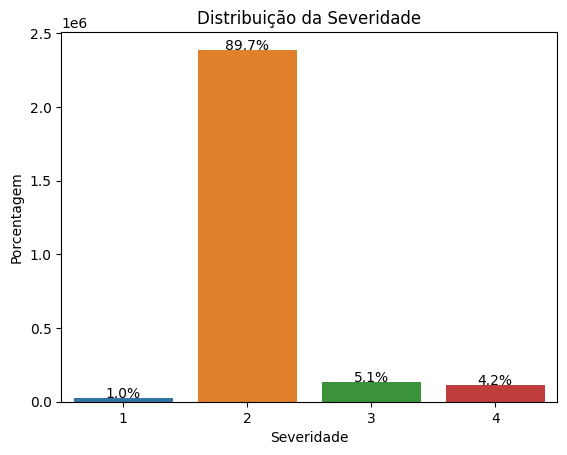

In [77]:
# Proporção da severidade dos acidentes
order = [1, 2, 3, 4]
ax = sns.countplot(x='Severity', order=order, data=dados_acidentes_total)
plt.title('Distribuição da Severidade')
plt.ylabel('Porcentagem')
plt.xlabel('Severidade')

total = float(len(dados_acidentes_total))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha='center')

plt.show()

In [82]:
#Colocando os dias da semana e finais de semana
# adicionando uma coluna com o dia da semana por extenso
dados_acidentes_total['dia_da_semana'] = dados_acidentes_total['Start_Time'].apply(lambda x: x.strftime('%A'))

# adicionando uma coluna para indicar se é final de semana ou não
dados_acidentes_total['final_de_semana'] = dados_acidentes_total['Start_Time'].apply(lambda x: "final semana" if x.weekday() in [5, 6] else "dia útil")

In [88]:
count = dados_acidentes_total.groupby(['dia_da_semana'])['Severity'].count()
total = dados_acidentes_total['Severity'].count()
count/total * 100

dia_da_semana
Friday       17.363836
Monday       14.683119
Saturday     11.071919
Sunday        9.039718
Thursday     16.305236
Tuesday      15.559100
Wednesday    15.977072
Name: Severity, dtype: float64

In [87]:
counts = dados_acidentes_total.groupby(['dia_da_semana', 'Severity'])['Severity'].count()
total_by_weekday = dados_acidentes_total.groupby(['dia_da_semana'])['Severity'].count()
counts / total_by_weekday * 100

dia_da_semana  Severity
Friday         1            1.049769
               2           89.727488
               3            5.255553
               4            3.967190
Monday         1            1.031155
               2           89.180678
               3            5.384464
               4            4.403703
Saturday       1            0.703922
               2           91.192664
               3            3.851047
               4            4.252367
Sunday         1            0.793196
               2           90.196201
               3            4.089799
               4            4.920805
Thursday       1            1.031310
               2           89.433044
               3            5.522128
               4            4.013517
Tuesday        1            0.970686
               2           89.279722
               3            5.484221
               4            4.265371
Wednesday      1            0.980321
               2           89.539719
              

In [93]:
#Verificando os estados dos acidentes
print(dados_acidentes_total['State'].value_counts().head(10))

CA    743267
FL    387404
TX    140699
OR    116442
NY    102725
VA    102559
PA     95488
MN     92285
NC     86354
SC     85727
Name: State, dtype: int64


In [95]:
# Analisando a severidade dos acidentes dos estados de CA, FL e TX.
tmp_dados_acidentes_total = dados_acidentes_total[dados_acidentes_total['State'].isin(['CA', 'FL', 'TX', 'OR'])]
counts = tmp_dados_acidentes_total.groupby(['State', 'Severity'])['Severity'].count()
total_by_state = dados_acidentes_total.groupby(['State'])['Severity'].count()
counts / total_by_state * 100

State  Severity
CA     1            0.663019
       2           96.201231
       3            2.146200
       4            0.989550
FL     1            0.709595
       2           94.374864
       3            2.698733
       4            2.216807
OR     1            1.077790
       2           93.980694
       3            1.927140
       4            3.014376
TX     1            0.668093
       2           84.022630
       3           12.441453
       4            2.867824
Name: Severity, dtype: float64

In [96]:
# Analisando a temperatura
media = dados_acidentes_total["Temperature(F)"].mean()
desvio_padrao = dados_acidentes_total["Temperature(F)"].std()
valor_minimo = dados_acidentes_total["Temperature(F)"].min()
valor_maximo = dados_acidentes_total["Temperature(F)"].max()
quartis = dados_acidentes_total["Temperature(F)"].quantile([0.25, 0.5, 0.75])

print("Média: ", media)
print("Desvio Padrão: ", desvio_padrao)
print("Valor Mínimo: ", valor_minimo)
print("Valor Máximo: ", valor_maximo)
print("Quartis: ", quartis)

Média:  61.9686160974525
Desvio Padrão:  18.585864696268196
Valor Mínimo:  -33.0
Valor Máximo:  196.0
Quartis:  0.25    50.0
0.50    64.0
0.75    76.0
Name: Temperature(F), dtype: float64


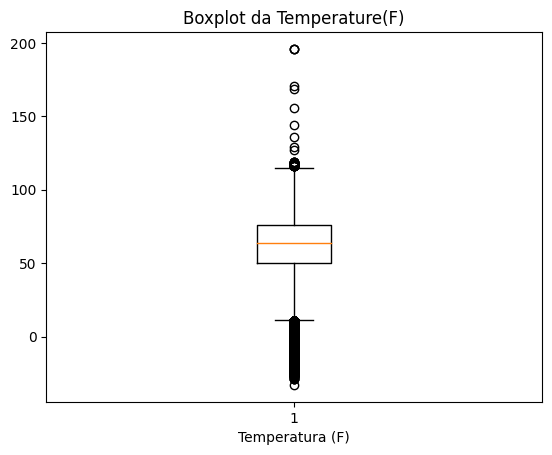

In [98]:
plt.boxplot(dados_acidentes_total["Temperature(F)"])
plt.title("Boxplot da Temperature(F)")
plt.xlabel("Temperatura (F)")
plt.show()

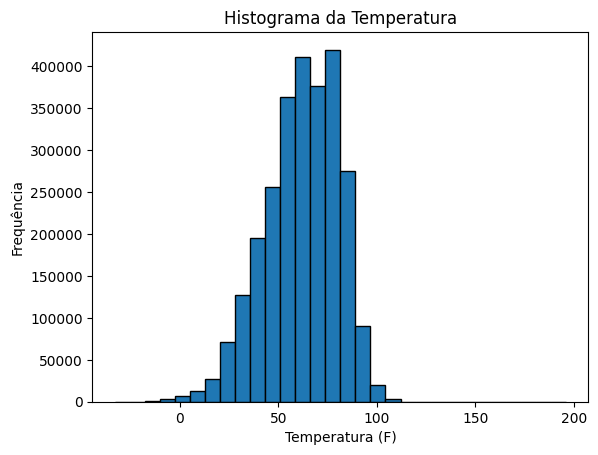

In [105]:
plt.hist(dados_acidentes_total["Temperature(F)"], bins=30, edgecolor='black')
plt.title("Histograma da Temperatura")
plt.xlabel("Temperatura (F)")
plt.ylabel("Frequência")
plt.show()

In [106]:
# Analisando a humidade
media = dados_acidentes_total["Humidity(%)"].mean()
desvio_padrao = dados_acidentes_total["Humidity(%)"].std()
valor_minimo = dados_acidentes_total["Humidity(%)"].min()
valor_maximo = dados_acidentes_total["Humidity(%)"].max()
quartis = dados_acidentes_total["Humidity(%)"].quantile([0.25, 0.5, 0.75])

print("Média: ", media)
print("Desvio Padrão: ", desvio_padrao)
print("Valor Mínimo: ", valor_minimo)
print("Valor Máximo: ", valor_maximo)
print("Quartis: ", quartis)

Média:  64.13776262177056
Desvio Padrão:  22.839088598632834
Valor Mínimo:  1.0
Valor Máximo:  100.0
Quartis:  0.25    48.0
0.50    66.0
0.75    83.0
Name: Humidity(%), dtype: float64


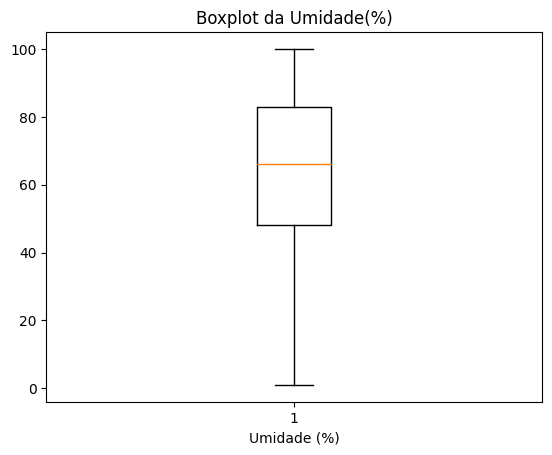

In [111]:
plt.boxplot(dados_acidentes_total["Humidity(%)"])
plt.title("Boxplot da Umidade(%)")
plt.xlabel("Umidade (%)")
plt.show()

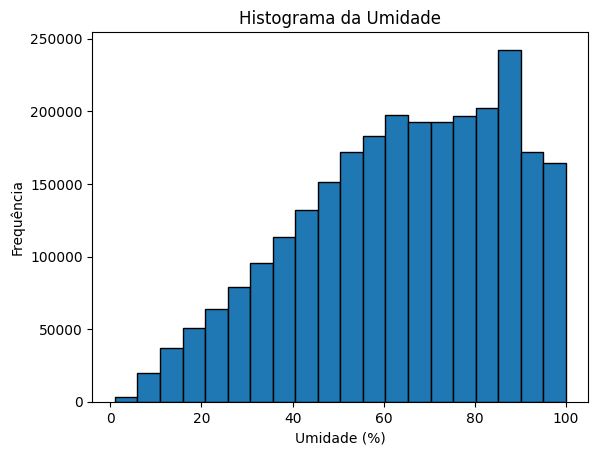

In [112]:
plt.hist(dados_acidentes_total["Humidity(%)"], bins=20, edgecolor='black')
plt.title("Histograma da Umidade")
plt.xlabel("Umidade (%)")
plt.ylabel("Frequência")
plt.show()

In [113]:
# Analisando a velocidade do vento
media = dados_acidentes_total["Wind_Speed(mph)"].mean()
desvio_padrao = dados_acidentes_total["Wind_Speed(mph)"].std()
valor_minimo = dados_acidentes_total["Wind_Speed(mph)"].min()
valor_maximo = dados_acidentes_total["Wind_Speed(mph)"].max()
quartis = dados_acidentes_total["Wind_Speed(mph)"].quantile([0.25, 0.5, 0.75])

print("Média: ", media)
print("Desvio Padrão: ", desvio_padrao)
print("Valor Mínimo: ", valor_minimo)
print("Valor Máximo: ", valor_maximo)
print("Quartis: ", quartis)

Média:  7.396238559125955
Desvio Padrão:  5.5040430738152075
Valor Mínimo:  0.0
Valor Máximo:  1087.0
Quartis:  0.25     3.5
0.50     7.0
0.75    10.0
Name: Wind_Speed(mph), dtype: float64


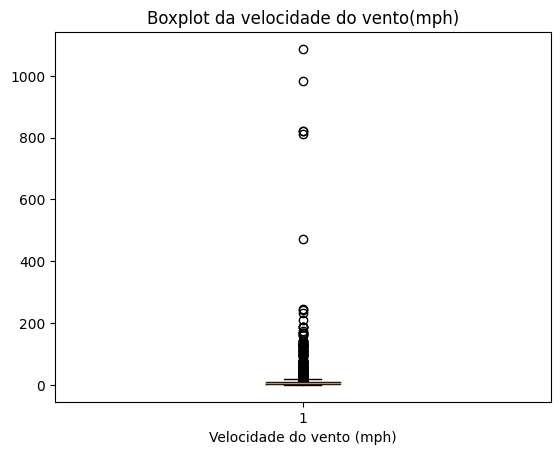

In [114]:
plt.boxplot(dados_acidentes_total["Wind_Speed(mph)"])
plt.title("Boxplot da velocidade do vento(mph)")
plt.xlabel("Velocidade do vento (mph)")
plt.show()

In [122]:
# Analisando as condições climáticas de temperatura e a severidade dos acidentes
dados_acidentes_total.groupby(['Severity'])['Temperature(F)'].mean()

Severity
1    71.226386
2    62.000329
3    62.390612
4    58.681194
Name: Temperature(F), dtype: float64

<Axes: xlabel='Severity', ylabel='Temperature(F)'>

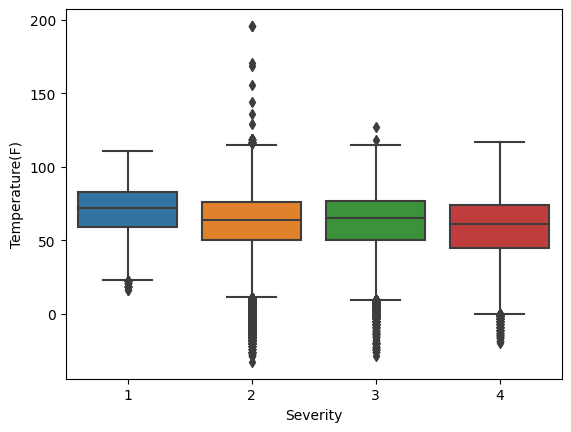

In [139]:
sns.boxplot(data=dados_acidentes_total, x='Severity', y='Temperature(F)')

In [123]:
# Analisando as condições de umidade e a severidade dos acidentes
dados_acidentes_total.groupby(['Severity'])['Humidity(%)'].mean()

Severity
1    50.028117
2    64.223473
3    63.339234
4    66.488806
Name: Humidity(%), dtype: float64

<Axes: xlabel='Severity', ylabel='Humidity(%)'>

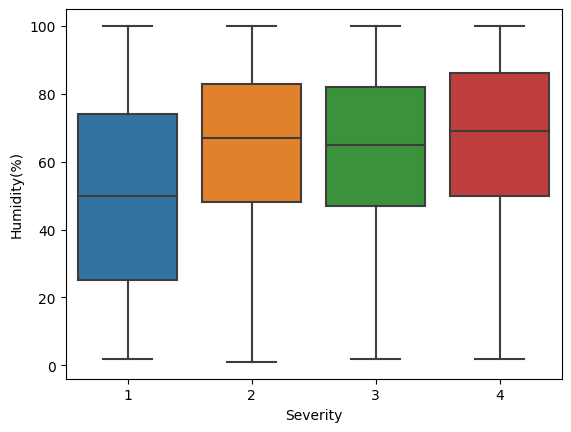

In [140]:
sns.boxplot(data=dados_acidentes_total, x='Severity', y='Humidity(%)')

In [124]:
# Analisando as condições de visibilidade e a severidade dos acidentes
dados_acidentes_total.groupby(['Severity'])['Visibility(mi)'].mean()

Severity
1    9.530995
2    9.087711
3    9.370205
4    9.129725
Name: Visibility(mi), dtype: float64

<Axes: xlabel='Severity', ylabel='Visibility(mi)'>

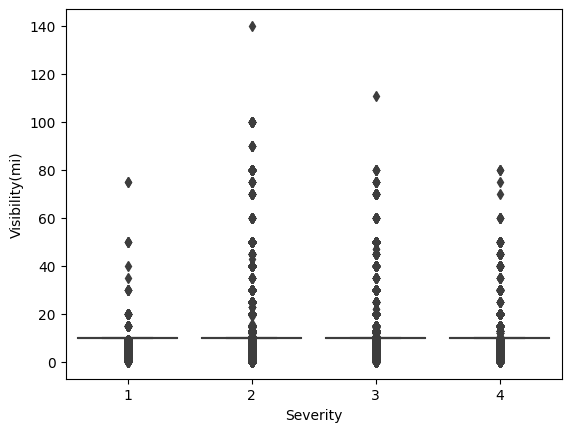

In [141]:
sns.boxplot(data=dados_acidentes_total, x='Severity', y='Visibility(mi)')

In [125]:
# Analisando as condições de velocidade do vento e a severidade dos acidentes
dados_acidentes_total.groupby(['Severity'])['Wind_Speed(mph)'].mean()

Severity
1    8.394110
2    7.265685
3    8.996491
4    8.004964
Name: Wind_Speed(mph), dtype: float64

<Axes: xlabel='Severity', ylabel='Wind_Speed(mph)'>

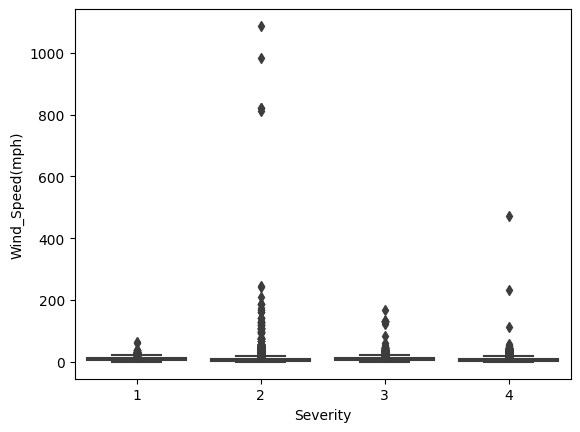

In [142]:
sns.boxplot(data=dados_acidentes_total, x='Severity', y='Wind_Speed(mph)')

In [138]:
# Analisando as condições de presença de semáforo e a severidade dos acidentes
t = dados_acidentes_total.groupby(['Severity'])['Traffic_Signal'].count()
p = dados_acidentes_total.groupby(['Severity','Traffic_Signal'])['Traffic_Signal'].count()
p/t*100

Severity  Traffic_Signal
1         False             53.861216
          True              46.138784
2         False             91.086930
          True               8.913070
3         False             88.643491
          True              11.356509
4         False             89.564970
          True              10.435030
Name: Traffic_Signal, dtype: float64

In [137]:
# Analisando as condições de presença de semáforo e a severidade dos acidentes
t = dados_acidentes_total.groupby(['Severity'])['Sunrise_Sunset'].count()
p = dados_acidentes_total.groupby(['Severity','Sunrise_Sunset'])['Sunrise_Sunset'].count()
p/t*100

Severity  Sunrise_Sunset
1         Day               83.309837
          Night             16.690163
2         Day               63.637917
          Night             36.362083
3         Day               71.081373
          Night             28.918627
4         Day               60.700531
          Night             39.299469
Name: Sunrise_Sunset, dtype: float64

In [146]:
#Colunas de dados utilizados
dados_acidentes.columns
for n in range(len(dados_acidentes_total.columns)):
    print('Dados sobre: {}'.format(dados_acidentes_total.columns[n]))

Dados sobre: Severity
Dados sobre: Start_Time
Dados sobre: End_Time
Dados sobre: Side
Dados sobre: City
Dados sobre: County
Dados sobre: State
Dados sobre: Temperature(F)
Dados sobre: Humidity(%)
Dados sobre: Pressure(in)
Dados sobre: Visibility(mi)
Dados sobre: Wind_Direction
Dados sobre: Wind_Speed(mph)
Dados sobre: Traffic_Signal
Dados sobre: Sunrise_Sunset
Dados sobre: Ano
Dados sobre: Mes_ano
Dados sobre: Duracao(min)
Dados sobre: Total_veh
Dados sobre: dia_da_semana
Dados sobre: final_de_semana


In [147]:
#Formato do dataframe
print('A fonte de dados contem linhas: {:,d} e colunas: {}'.format(dados_acidentes_total.shape[0], dados_acidentes_total.shape[1]))

A fonte de dados contem linhas: 2,662,384 e colunas: 21


## Seleção dos atributos com maior correlação
Analisando os atributos não categóricos.

In [148]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [149]:
X_select = dados_acidentes_total.drop(['Severity','Start_Time','End_Time','Ano','Mes_ano','City','County','State','Wind_Direction',
                                       'Sunrise_Sunset','Side','dia_da_semana','final_de_semana'], axis=1)
y_select = dados_acidentes_total['Severity']

In [150]:
X_select

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Traffic_Signal,Duracao(min),Total_veh
0,42.1,58.0,29.76,10.0,10.4,False,360,9979600
1,37.0,93.0,29.69,10.0,10.4,False,360,9979600
2,35.6,100.0,29.66,10.0,8.1,True,360,9979600
3,33.8,100.0,29.63,3.0,2.3,False,360,9979600
4,33.1,92.0,29.63,0.5,3.5,False,360,9979600
...,...,...,...,...,...,...,...,...
2662379,86.0,40.0,28.92,10.0,13.0,False,28,33535000
2662380,70.0,73.0,29.39,10.0,6.0,False,26,33535000
2662381,73.0,64.0,29.74,10.0,10.0,False,28,33535000
2662382,71.0,81.0,29.62,10.0,8.0,False,29,33535000


In [158]:
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X_select, y_select)
selected_features = X_select.columns[selector.get_support()]

var_select = dados_acidentes_total[selected_features]
var_select

,Temperature(F),Humidity(%),Wind_Speed(mph),Traffic_Signal,Total_veh
0,42.1,58.0,10.4,False,9979600
1,37.0,93.0,10.4,False,9979600
2,35.6,100.0,8.1,True,9979600
3,33.8,100.0,2.3,False,9979600
4,33.1,92.0,3.5,False,9979600
...,...,...,...,...,...
2662379,86.0,40.0,13.0,False,33535000
2662380,70.0,73.0,6.0,False,33535000
2662381,73.0,64.0,10.0,False,33535000
2662382,71.0,81.0,8.0,False,33535000


Fora retirados os atributos, "Duracao(min)", "Visibility(mi)" e "Pressure(in)"

- Dados sobre o volume de carros registrado por estado dos EUA nos anos de 2016 a 2021. 

https://afdc.energy.gov/vehicle-registration?year=2016

In [52]:
#Agrupar por cidades
df_cidade = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'Cidade', 'City':'Acidentes'})
df_cidade.head(-5)

,Cidade,Acidentes
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
...,...,...
11671,Linn,1
11672,Stella,1
11673,York New Salem,1
11674,Algona,1


In [66]:
#Agrupar por estados
#Agrupar por cidades
df_estado = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'Estado', 'City':'Acidentes'})
df_estado.head(10)

,Estado,State
0,CA,795868
1,FL,401388
2,TX,149037
3,OR,126341
4,VA,113535
5,NY,108049
6,PA,99975
7,MN,97185
8,NC,91362
9,SC,89216


In [67]:
#Nomes dos estados
df_state = pd.read_csv('I:/OneDrive - det.ufc.br/Cursos Extras/Pos Ciencia de Dados e Big Data/TCC-PucMinas/Database/state_name.csv',sep=';')

In [68]:
df_state.head()

,Estado,Nome
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,AmericanSamoa
4,AZ,Arizona


In [73]:
df_estado = pd.merge(df_estado, df_state, on='Estado')
# df_estado.drop(['state_x','name_x','state_y,','name_y' axis=1, inplace=True)
df_estado.drop('Nome_y', axis=1, inplace=True)
df_estado

,Estado,State,Nome
0,CA,795868,California
1,FL,401388,Florida
2,TX,149037,Texas
3,OR,126341,Oregon
4,VA,113535,Virginia
5,NY,108049,NewYork
6,PA,99975,Pennsylvania
7,MN,97185,Minnesota
8,NC,91362,NorthCarolina
9,SC,89216,SouthCarolina


In [74]:
df.value_counts("Severity")

Severity
2    2532991
3     155105
4     131193
1      26053
dtype: int64

<Axes: xlabel='Side', ylabel='Temperature(F)'>

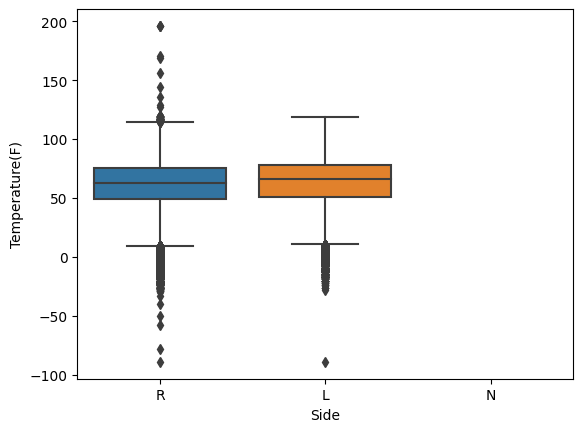

In [17]:
sns.boxplot(data=df, x='Side', y='Temperature(F)')

In [15]:
df.groupby('Severity').agg(media_temp=('Temperature(F)','mean'))

,media_temp
Severity,
1,71.257955
2,61.868632
3,61.920769
4,58.275355


In [27]:
#Colunas com infos de mes e ano
df['Data_mes'] = pd.to_datetime(df['Start_Time'], format='%m/%yyyy')
df['Data_ano'] = pd.to_datetime(df['Start_Time'], format='%yyyy')

In [35]:
df_grouped = df.groupby(pd.Grouper(key='Start_Time', freq='M')).mean()

C:\Users\William\AppData\Local\Temp\ipykernel_9616\4199387081.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(pd.Grouper(key='Start_Time', freq='M')).mean()


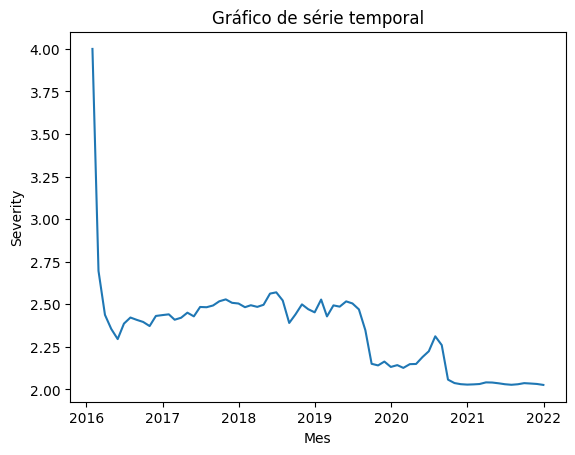

In [37]:
sns.lineplot(data=df_grouped, x='Start_Time', y='Severity')
plt.xlabel('Mes')
plt.ylabel('Severity')
plt.title('Gráfico de série temporal')
plt.show()

In [34]:
df_grouped.index

DatetimeIndex(['2016-01-14 20:18:33', '2016-02-08 00:37:08',
               '2016-02-08 05:56:20', '2016-02-08 06:15:39',
               '2016-02-08 06:51:45', '2016-02-08 07:53:43',
               '2016-02-08 08:15:41', '2016-02-08 08:16:57',
               '2016-02-08 11:51:46', '2016-02-08 14:19:57',
               ...
               '2021-12-31 22:36:13', '2021-12-31 22:37:00',
               '2021-12-31 22:37:11', '2021-12-31 22:39:30',
               '2021-12-31 22:40:00', '2021-12-31 22:41:00',
               '2021-12-31 22:42:00', '2021-12-31 23:22:00',
               '2021-12-31 23:26:30', '2021-12-31 23:30:00'],
              dtype='datetime64[ns]', name='Data_mes', length=1807311, freq=None)

In [221]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


## DataSet das informações por localização (WebScrapping)

In [181]:
locations = [
    {'latitude': 40.100006, 'longitude': -83.1, 'datahora': '2016-02-08T08:00'},
    {'latitude': 39.9612, 'longitude': -82.9988, 'datahora': '2016-02-08T09:00'},
    {'latitude': 41.8781, 'longitude': -87.6298, 'datahora': '2016-02-08T10:00'}]
data = {
    'latitude': [loc['latitude'] for loc in locations],
    'longitude': [loc['longitude'] for loc in locations],
    'datahora': [loc['datahora'] for loc in locations],
    'temperatura': []}

In [209]:
df_request = pd.DataFrame()
df_request["Latitude"] = df["Start_Lat"]
df_request["Longitude"] = df["Start_Lng"]
df_request["Time"] = pd.to_datetime(df["Start_Time"]).dt.strftime("%Y-%m-%d")

In [211]:
len(df_request)

2845342

In [214]:
df_request.head()

,Latitude,Longitude,Time
0,40.108910,-83.092860,2016-02-08
1,39.865420,-84.062800,2016-02-08
2,39.102660,-84.524680,2016-02-08
3,41.062130,-81.537840,2016-02-08
4,39.172393,-84.492792,2016-02-08


In [212]:
df_request = df_request.drop_duplicates()

In [216]:
len(df_request)

2437913

In [220]:
df_request.head(3)

,Latitude,Longitude,Time
0,40.10891,-83.09286,2016-02-08
1,39.86542,-84.06280,2016-02-08
2,39.10266,-84.52468,2016-02-08


In [197]:

request = requests.get(f'https://archive-api.open-meteo.com/v1/archive?latitude={}40.108910&longitude=-83.092860&start_date=2016-02-08&end_date=2016-02-08&hourly=apparent_temperature&hourly=precipitation')
df_request = request.json()
df_request

{'latitude': 40.100006,
 'longitude': -83.1,
 'generationtime_ms': 0.6209611892700195,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 270.0,
 'hourly_units': {'time': 'iso8601',
  'apparent_temperature': '°C',
  'precipitation': 'mm'},
 'hourly': {'time': ['2016-02-08T00:00',
   '2016-02-08T01:00',
   '2016-02-08T02:00',
   '2016-02-08T03:00',
   '2016-02-08T04:00',
   '2016-02-08T05:00',
   '2016-02-08T06:00',
   '2016-02-08T07:00',
   '2016-02-08T08:00',
   '2016-02-08T09:00',
   '2016-02-08T10:00',
   '2016-02-08T11:00',
   '2016-02-08T12:00',
   '2016-02-08T13:00',
   '2016-02-08T14:00',
   '2016-02-08T15:00',
   '2016-02-08T16:00',
   '2016-02-08T17:00',
   '2016-02-08T18:00',
   '2016-02-08T19:00',
   '2016-02-08T20:00',
   '2016-02-08T21:00',
   '2016-02-08T22:00',
   '2016-02-08T23:00'],
  'apparent_temperature': [3.2,
   2.8,
   2.0,
   1.0,
   1.1,
   1.1,
   1.0,
   0.9,
   0.2,
   -0.3,
   -0.5,
   -0.5,
   -0.6,
   -1.0,
   -1.

In [ ]:
# Cria um novo dataframe vazio
result_df = pd.DataFrame()

# Itera sobre as linhas do dataframe
for index, row in df.iterrows():
    latitude = row["latitude"]
    longitude = row["longitude"]
    date = row["datetime"].strftime("%Y-%m-%d") # Converte a data para o formato esperado pela API
    url = f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={date}&end_date={date}&hourly=apparent_temperature&hourly=precipitation'
    response = requests.get(url)
    # Processa a resposta aqui
    data = response.json() # Converte a resposta em um dicionário Python
    # Extrai os valores desejados do dicionário
    temperature = data["data"][0]["apparent_temperature"]
    precipitation = data["data"][0]["precipitation"]
    # Cria um novo dicionário com os valores extraídos
    result = {"latitude": latitude, "longitude": longitude, "date": date, "apparent_temperature": temperature, "precipitation": precipitation}
    # Adiciona o novo dicionário ao dataframe de resultados
    result_df = result_df.append(result, ignore_index=True)

In [201]:
# carrega o json como um dicionário
# dados_json = '{"latitude": 40.100006, "longitude": -83.1, "generationtime_ms": 0.41496753692626953, "utc_offset_seconds": 0, "timezone": "GMT", "timezone_abbreviation": "GMT", "elevation": 270.0, "hourly_units": {"time": "iso8601", "apparent_temperature": "°C", "precipitation": "mm"}, "hourly": {"time": ["2016-02-08T00:00", "2016-02-08T01:00"], "apparent_temperature": [3.2, 2.8], "precipitation": [0.0, 0.0]}}'
dados_dict = (df_request)

# cria um DataFrame a partir do dicionário
df_temp_prec = pd.DataFrame(dados_dict['hourly'])

# verifica se os valores de temperatura e precipitação são listas
if isinstance(df_temp_prec['time'][0], list):
    df_temp_prec['time'] = df_temp_prec['time'].apply(lambda x: x[0])
if isinstance(df_temp_prec['apparent_temperature'][0], list):
    df_temp_prec['apparent_temperature'] = df_temp_prec['apparent_temperature'].apply(lambda x: x[0])
if isinstance(df_temp_prec['precipitation'][0], list):
    df_temp_prec['precipitation'] = df_temp_prec['precipitation'].apply(lambda x: x[0])

# adiciona as informações do tempo ao DataFrame
df_temp_prec['latitude'] = dados_dict['latitude']
df_temp_prec['longitude'] = dados_dict['longitude']

# reorganiza as colunas do DataFrame
df_temp_prec = df_temp_prec[['latitude', 'longitude','time', 'apparent_temperature', 'precipitation']]

# exibe o DataFrame resultante
print(df_temp_prec)

     latitude  longitude              time  apparent_temperature  \
0   40.100006      -83.1  2016-02-08T00:00                   3.2   
1   40.100006      -83.1  2016-02-08T01:00                   2.8   
2   40.100006      -83.1  2016-02-08T02:00                   2.0   
3   40.100006      -83.1  2016-02-08T03:00                   1.0   
4   40.100006      -83.1  2016-02-08T04:00                   1.1   
5   40.100006      -83.1  2016-02-08T05:00                   1.1   
6   40.100006      -83.1  2016-02-08T06:00                   1.0   
7   40.100006      -83.1  2016-02-08T07:00                   0.9   
8   40.100006      -83.1  2016-02-08T08:00                   0.2   
9   40.100006      -83.1  2016-02-08T09:00                  -0.3   
10  40.100006      -83.1  2016-02-08T10:00                  -0.5   
11  40.100006      -83.1  2016-02-08T11:00                  -0.5   
12  40.100006      -83.1  2016-02-08T12:00                  -0.6   
13  40.100006      -83.1  2016-02-08T13:00      

In [1]:
dados_dict

NameError: name 'dados_dict' is not defined

In [148]:
data = json.loads(df_request.text)

AttributeError: 'dict' object has no attribute 'text'

## Início do modelo de machine learning
Utilizar 3 modelos diferentes
- Clusterização
- Predição do nível de severidade
- Probabilidade do nível de severidade

Aqui estão três sugestões de técnicas de Machine Learning que podem ser usadas para clusterização e predição da severidade dos acidentes de trânsito:

Random Forests (RF): É um algoritmo de aprendizado supervisionado que pode ser usado tanto para classificação quanto para regressão. Ele constrói várias árvores de decisão e combina suas previsões para obter resultados mais precisos e estáveis 1.

Logistic Regression (LR): É um algoritmo de aprendizado supervisionado usado principalmente para problemas de classificação binária. Ele usa uma função logística para modelar a probabilidade de uma observação pertencer a uma das duas classes 1.

Naive Bayes (NB): É um algoritmo de aprendizado supervisionado baseado no teorema de Bayes. Ele assume que as características são independentes entre si e calcula a probabilidade de cada classe dado um conjunto de características 2.

Essas são apenas algumas sugestões, existem muitas outras técnicas que também podem ser usadas dependendo do seu conjunto de dados e do problema específico que você está tentando resolver.

In [ ]:
#Random Forests (RF)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregue seus dados aqui
X = ... # características
y = ... # rótulos

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crie o modelo Random Forests
rf = RandomForestClassifier(n_estimators=100)

# Treine o modelo com os dados de treinamento
rf.fit(X_train, y_train)

# Faça previsões com os dados de teste
y_pred = rf.predict(X_test)

# Calcule a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

#Este código carrega um conjunto de dados com características X e rótulos y, divide os dados em conjuntos de treinamento e 
# teste e cria um modelo Random Forests com 100 árvores. O modelo é então treinado com os dados de treinamento e usado para fazer previsões com os dados de teste. 
# Finalmente, a acurácia do modelo é calculada comparando as previsões com os rótulos verdadeiros.

In [182]:
dados_acidentes_total.dtypes

Severity                 category
Start_Time         datetime64[ns]
End_Time           datetime64[ns]
Side                     category
City                       object
County                     object
State                      object
Temperature(F)            float64
Humidity(%)               float64
Pressure(in)              float64
Visibility(mi)            float64
Wind_Direction             object
Wind_Speed(mph)           float64
Traffic_Signal               bool
Sunrise_Sunset             object
Ano                datetime64[ns]
Mes_ano            datetime64[ns]
Duracao(min)                int32
Total_veh                   int64
dtype: object

In [227]:
X['Side_R'].value_counts()

1    2196243
0     466141
Name: Side_R, dtype: int64

In [224]:
X

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Duracao(min),Total_veh,Side_R,Side_L,Side_N,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Traffic_Signal_False,Traffic_Signal_True,Sunrise_Sunset_Day,Sunrise_Sunset_Night
0,42.1,58.0,29.76,10.0,10.4,360,9979600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,37.0,93.0,29.69,10.0,10.4,360,9979600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,35.6,100.0,29.66,10.0,8.1,360,9979600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,33.8,100.0,29.63,3.0,2.3,360,9979600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,33.1,92.0,29.63,0.5,3.5,360,9979600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662379,86.0,40.0,28.92,10.0,13.0,28,33535000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2662380,70.0,73.0,29.39,10.0,6.0,26,33535000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2662381,73.0,64.0,29.74,10.0,10.0,28,33535000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2662382,71.0,81.0,29.62,10.0,8.0,29,33535000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [184]:
X.dtypes

Severity                      category
Start_Time              datetime64[ns]
End_Time                datetime64[ns]
City                            object
County                          object
Temperature(F)                 float64
Humidity(%)                    float64
Pressure(in)                   float64
Visibility(mi)                 float64
Wind_Direction                  object
Wind_Speed(mph)                float64
Ano                     datetime64[ns]
Mes_ano                 datetime64[ns]
Duracao(min)                     int32
Total_veh                        int64
Side_R                           uint8
Side_L                           uint8
Side_N                           uint8
State_AL                         uint8
State_AR                         uint8
State_AZ                         uint8
State_CA                         uint8
State_CO                         uint8
State_CT                         uint8
State_DC                         uint8
State_DE                 

In [228]:
#Random Forests (RF)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

# Carregue seus dados aqui
dados_acidentes_encoded = dados_acidentes_total[['Side','State','Temperature(F)','Humidity(%)','Pressure(in)',
                            'Visibility(mi)','Wind_Speed(mph)','Traffic_Signal','Sunrise_Sunset',
                            'Duracao(min)','Total_veh']] # características
dados_acidentes_encoded = pd.get_dummies(dados_acidentes_encoded, columns=['Side','State','Traffic_Signal','Sunrise_Sunset'])
X = dados_acidentes_encoded
y = dados_acidentes_total['Severity'] # rótulos

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crie o modelo Random Forests
rf_1 = RandomForestClassifier(n_estimators=50)

# Calcule as pontuações de validação cruzada
scores_rf_1 = cross_val_score(rf_1, X_train, y_train, cv=5)
print(f'Pontuações de validação cruzada: {scores_rf_1}')

Pontuações de validação cruzada: [0.91797775 0.91702701 0.91746815 0.91739303 0.91766769]


In [229]:
# Defina os valores dos hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5], #20, 25],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Crie o objeto GridSearchCV
grid_search_rf_1 = GridSearchCV(estimator=rf_1, param_grid=param_grid)

# Ajuste o GridSearchCV aos dados de treinamento
grid_search_rf_1.fit(X_train, y_train)

# Exiba os melhores hiperparâmetros encontrados
print(f'Melhores hiperparâmetros: {grid_search_rf_1.best_params_}')
# Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [230]:
# Crie um novo modelo Random Forests com os melhores hiperparâmetros encontrados
best_rf_1 = RandomForestClassifier(**grid_search_rf_1.best_params_)

# Treine o novo modelo com os dados de treinamento
best_rf_1.fit(X_train, y_train)

# Faça previsões com os dados de teste
y_pred = best_rf_1.predict(X_test)

# Calcule a acurácia do modelo
accuracy_rf_1 = accuracy_score(y_test, y_pred)
print(f'Acurácia modelo Random Forests (RF_1): {accuracy}')
#Acurácia modelo Random Forests (RF): 0.9207177023608532

Acurácia modelo Random Forests (RF_1): 0.9208716996227068


array([[  2629,   2242,    219,     11],
       [   452, 472467,   3260,   1615],
       [   215,  16991,   9108,    798],
       [   115,  15576,   1362,   5417]], dtype=int64)

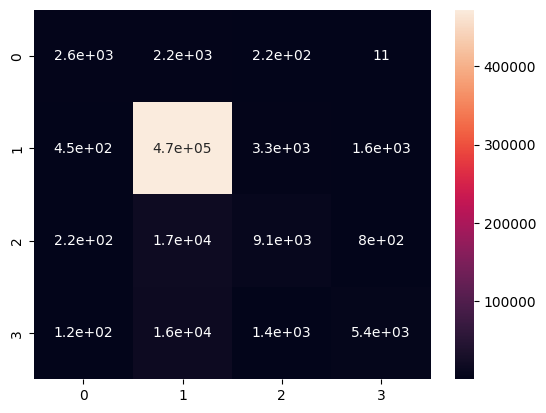

In [233]:
# Calcule a matriz de confusão
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize a matriz de confusão usando Seaborn
sns.heatmap(conf_mat, annot=True)

conf_mat

In [204]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = [0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1]

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precisão: 1.00
Recall: 0.67
F1-score: 0.80


In [ ]:
# Escolha uma árvore do modelo Random Forests
estimator = best_rf_1.estimators_[0]

# Exporte a árvore em formato DOT
dot_data = export_graphviz(estimator, out_file=None)

# Gere a imagem da árvore usando o Graphviz
graph = graphviz.Source(dot_data)
graph.render("tree")

Os hiperparâmetros são parâmetros do modelo que não são aprendidos a partir dos dados, mas são definidos pelo usuário antes do treinamento do modelo. Eles controlam vários aspectos do modelo e podem ter um impacto significativo no desempenho do modelo.

Aqui está o que cada um dos hiperparâmetros do modelo Random Forests significa:

n_estimators: O número de árvores na floresta. Quanto maior o número de árvores, mais robusto será o modelo, mas também mais lento para treinar e fazer previsões.

max_depth: A profundidade máxima das árvores. Isso controla o quão complexas as árvores podem ser. Valores maiores podem levar a um ajuste excessivo (overfitting) dos dados de treinamento.

min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno. Isso controla o quão detalhadas as árvores podem ser. Valores maiores podem levar a árvores mais simples e menos propensas a ajuste excessivo.

min_samples_leaf: O número mínimo de amostras necessárias para estar em um nó folha. Isso controla o tamanho das folhas das árvores. Valores maiores podem levar a árvores mais simples e menos propensas a ajuste excessivo.

Esses são apenas alguns dos hiperparâmetros disponíveis para o modelo Random Forests. Você pode consultar a documentação do scikit-learn para obter uma lista completa dos hiperparâmetros e suas descrições.

In [193]:
from sklearn.model_selection import GridSearchCV

# Defina os valores dos hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crie o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid)

# Ajuste o GridSearchCV aos dados de treinamento
grid_search.fit(X_train, y_train)

# Exiba os melhores hiperparâmetros encontrados
print(f'Melhores hiperparâmetros: {grid_search.best_params_}')

KeyboardInterrupt: 

In [186]:
#Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregue seus dados aqui
dados_acidentes_encoded = dados_acidentes_total[['Side','State','Temperature(F)','Humidity(%)','Pressure(in)',
                            'Visibility(mi)','Wind_Speed(mph)','Traffic_Signal','Sunrise_Sunset',
                            'Duracao(min)','Total_veh']] # características
dados_acidentes_encoded = pd.get_dummies(dados_acidentes_encoded, columns=['Side','State','Traffic_Signal','Sunrise_Sunset'])
X = dados_acidentes_encoded
y = dados_acidentes_total['Severity'] # rótulos

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crie o modelo Logistic Regression
lr_1 = LogisticRegression()

# Treine o modelo com os dados de treinamento
lr_1.fit(X_train, y_train)

# Faça previsões com os dados de teste
y_pred = lr_1.predict(X_test)

# Calcule a acurácia do modelo
accuracy_lr_1 = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy_lr_1}')

# Este código carrega um conjunto de dados com características X e rótulos y, divide os dados em conjuntos de treinamento e teste e cria um modelo Logistic Regression. 
# O modelo é então treinado com os dados de treinamento e usado para fazer previsões com os dados de teste. 
# Finalmente, a acurácia do modelo é calculada comparando as previsões com os rótulos verdadeiros.

Acurácia: 0.8971542432818694


Modelo Logistic Regression (LR)

In [205]:
#Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue seus dados aqui
dados_acidentes_encoded = dados_acidentes_total[['Side','State','Temperature(F)','Humidity(%)','Pressure(in)',
                            'Visibility(mi)','Wind_Speed(mph)','Traffic_Signal','Sunrise_Sunset',
                            'Duracao(min)','Total_veh']] # características
dados_acidentes_encoded = pd.get_dummies(dados_acidentes_encoded, columns=['Side','State','Traffic_Signal','Sunrise_Sunset'])
X = dados_acidentes_encoded
y = dados_acidentes_total['Severity'] # rótulos

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crie o modelo Logistic Regression
lr_1 = LogisticRegression()

In [209]:
# Defina os hiperparâmetros a serem ajustados
param_grid = {'C': [0.1, 1, 10], 
              'penalty': ['None', 'l2']
              }

# Crie o objeto GridSearchCV
grid_search_lr_1 = GridSearchCV(lr_1, param_grid, error_score='raise')

# Treine o modelo com os dados de treinamento e ajuste os hiperparâmetros
grid_search_lr_1.fit(X_train, y_train)

# Faça previsões com os dados de teste
y_pred = grid_search_lr_1.predict(X_test)

# Calcule a acurácia do modelo
accuracy_lr_1 = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy_lr_1}')

c:\Users\William\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\William\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\William\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\William\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\William\AppData\Local\Programs\Python\Pytho

Acurácia: 0.8972368759589616


Matriz de confusão: 
[[     0   5059      0      0]
 [     0 477758      0      0]
 [     0  27261      0      0]
 [     0  22399      0      0]]


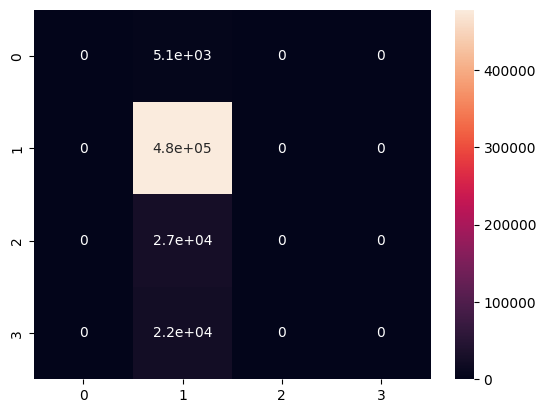

In [210]:
# Calcule a matriz de confusão
confusion_mtx = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusão: \n{confusion_mtx}')

# Visualize a matriz de confusão
sns.heatmap(confusion_mtx, annot=True)
plt.show()

In [211]:
# Calcule a pontuação de validação cruzada com 5 divisões
scores_lr_1 = cross_val_score(lr_1, X, y, cv=5)

# Imprima as pontuações de validação cruzada
print(f'Pontuações de validação cruzada: {scores_lr_1}')

Pontuações de validação cruzada: [0.89703968 0.89704156 0.89704156 0.895834   0.89704137]


In [187]:
#Naive Bayes (NB)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregue seus dados aqui
dados_acidentes_encoded = dados_acidentes_total[['Side','State','Temperature(F)','Humidity(%)','Pressure(in)',
                            'Visibility(mi)','Wind_Speed(mph)','Traffic_Signal','Sunrise_Sunset',
                            'Duracao(min)','Total_veh']] # características
dados_acidentes_encoded = pd.get_dummies(dados_acidentes_encoded, columns=['Side','State','Traffic_Signal','Sunrise_Sunset'])
X = dados_acidentes_encoded
y = dados_acidentes_total['Severity'] # rótulos

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crie o modelo Naive Bayes
nb_1 = GaussianNB()

# Treine o modelo com os dados de treinamento
nb_1.fit(X_train, y_train)

# Faça previsões com os dados de teste
y_pred = nb_1.predict(X_test)

# Calcule a acurácia do modelo
accuracy_nb_1 = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy_nb_1}')

# Este código carrega um conjunto de dados com características X e rótulos y, divide os dados em conjuntos de treinamento e teste e cria um modelo Naive Bayes. 
# O modelo é então treinado com os dados de treinamento e usado para fazer previsões com os dados de teste. 
# Finalmente, a acurácia do modelo é calculada comparando as previsões com os rótulos verdadeiros.

Acurácia: 0.8963542087263863


In [212]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue seus dados aqui
dados_acidentes_encoded = dados_acidentes_total[['Side','State','Temperature(F)','Humidity(%)','Pressure(in)',
                            'Visibility(mi)','Wind_Speed(mph)','Traffic_Signal','Sunrise_Sunset',
                            'Duracao(min)','Total_veh']] # características
dados_acidentes_encoded = pd.get_dummies(dados_acidentes_encoded, columns=['Side','State','Traffic_Signal','Sunrise_Sunset'])
X = dados_acidentes_encoded
y = dados_acidentes_total['Severity'] # rótulos

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crie o modelo Naive Bayes
nb_1 = GaussianNB()

In [213]:
# Defina os hiperparâmetros que deseja ajustar e seus valores possíveis
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Crie o objeto GridSearchCV com o modelo e os hiperparâmetros
grid_search_nb_1 = GridSearchCV(nb_1, param_grid=param_grid, cv=5)

# Treine o modelo com os dados de treinamento e ajuste os hiperparâmetros usando validação cruzada
grid_search_nb_1.fit(X_train, y_train)

# Imprima os melhores hiperparâmetros encontrados pelo GridSearchCV
print(f'Melhores hiperparâmetros: {grid_search_nb_1.best_params_}')

Melhores hiperparâmetros: {'var_smoothing': 1e-07}


Acurácia: 0.8971955596204155


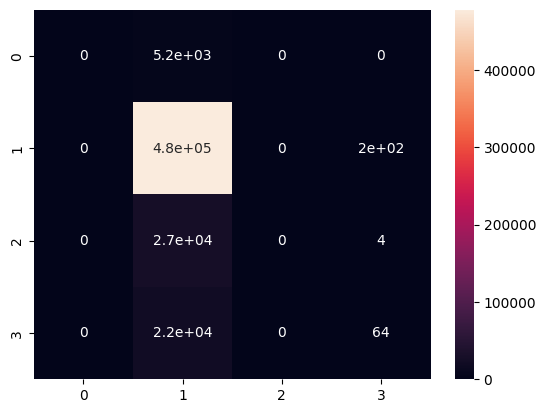

In [214]:
# Faça previsões com os dados de teste usando o melhor modelo encontrado pelo GridSearchCV
y_pred = grid_search_nb_1.predict(X_test)

# Calcule a acurácia do modelo
accuracy_nb_1 = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy_nb_1}')

# Calcule a matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize a matriz de confusão usando um heatmap do seaborn
sns.heatmap(confusion_mat, annot=True)
plt.show()

In [215]:
# Suponha que você tenha as características de um acidente em uma matriz chamada acidente_caracteristicas
acidente_caracteristicas = [[0, 1, 0]]

# Você pode usar o método predict do objeto grid_search para prever a gravidade do acidente
gravidade_prevista = grid_search_nb_1.predict(acidente_caracteristicas)

# Imprima a gravidade prevista
print(f'Gravidade prevista: {gravidade_prevista}')

c:\Users\William\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but GaussianNB is expecting 63 features as input.